# **PyDicom… the best choice for Pythonistas**

> **If you are a Pythonista** and you're working with Medical Data, especially DICOM data, you've probably heard of the great python package PyDicom. In this post, you'll learn the basics of this package. We'll discuss PyDicom classes (DataSet, DataElement, Sequence) and some useful methods and attributes that you can apply to PyDicom classes.

> **PyDicom** is a pure Python package for working with DICOM files such as medical images, reports, and radiotherapy objects. PyDicom makes it easy to read and write these complex files into natural pythonic structures for easy manipulation.

> **DICOM**, Digital Imaging and Communications in Medicine, is the standard language of Medical Imaging Systems. When you hear the word "DICOM", you probably think of it as just medical images. But **Healthcare Data Scientists/Analysts** may consider it as treasury as any other medical Dataset. Because it goes beyond just data of pixels. A DICOM file contains many useful data related to the patient, the imaging modality, and others.

> Dealing with DICOM metadata and accessing specific attributes and data is very helpful for anyone, data scientist/analyst, working with DICOM files. Luckily, PyDicom provides many useful functions, methods, and attributes on DICOM files.

# **Let's Begin Coding**
When I want to discover a new Python package, I usually begin with a general examples using this package and then dive into it more and more gradually. My main purpose is to learn how to extract the metadata of many DICOM files and convert it to a Dataset that I can use for analyzing exploration.

So… let's begin our journey with common example of PyDicom.

##We will discuss the following:
> **Example of reading a DICOM File**

> **Core Elements in PyDicom**

> **PyDICOM DataSet**

> **Methods for PyDicom DataSet**
- **.keys()** Method
- **.values()** Method
- **.elements()** Method
- **.group_dataset()** Method
- **.dir() Method**

> **Attributes for PyDicom DataSet**
- **pixel_array** Attribute

> **PyDicom DataElement**

> **PyDicom Sequence**

# **Example of reading a DICOM File**

To read a DICOM file using pydicom, you can use the following steps:
- Install pydicom: To use pydicom, you will need to install it using pip.

In [ ]:
# Install PyDicom Package
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.4 MB/s 


- Import the pydicom library: In your Python script, you will need to import the pydicom library in order to use it.

In [ ]:
# Import the pacakage
import pydicom

> There are a lot of DICOM samples on the internet. And you can use your own DICOM files. For this post, I chose a [dataset](https://www.kaggle.com/datasets/dmisky/dlwptvolumetricdicomlung) of 99 slices of chest-CT scan for one patient. You can find it on Kaggle. I saved the dataset on my [Drive](https://drive.google.com/drive/folders/1dbJpXVUBn0mSUxgJIqKZj4d_0thSeTW3) so I can easily have access through GoogleColab.


- Read the DICOM file: To read a DICOM file, you can use the dcmread function, which returns a Dataset object containing the data from the DICOM file.

> Note: Sometimes, the output of some code lines will be too long and bulky. Sorry in advance about that!!! But this a great chance for you to get a taste of how DICOM files look like in real life. So, I hope you bear with me for these long outputs :)

In [ ]:
# Reading a DICOM file from a specific path
dcm_data = pydicom.dcmread('/content/drive/MyDrive/Datasets/Kaggle/DICOM/dicom_lung/000000.dcm')
dcm_data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055
(0008, 0020) St

Clearly, there are a lot of DICOM metadata other than pixel data. But we can see a pattern of the output, whereas the DICOM attributes are written row by row. Each row has a unique tag and other core elements of the DICOM attribute. Let's discuss them in more detail.

#**Core Elements in PyDicom**

Applying .dcmread() wraps a DataSet, which is a dictionary data structure {}. This DataSet contains keys and values represented like the following:
- ***Keys:*** contains the DICOM Tags of the attributes specified in the DICOM file you are reading. Examples of the keys like:
 - (0x0010, 0x0010) PatientName attribute.
 - (0x0028, 0x0010) Rows attribute.
 - (0x7fe0, 0x0010) PixelData attribute.
     
  The tags' numbers consist of two hexadecimal, the first refers to the group, and the second refers to a specific element. So, you might find many attributes that have the same first number of tags.

- ***Values:*** the values of this dictionary generally contain the following:
 - **Tag:** the element's tag like (0028, 0030), for example.
 - **Keyword:** describes what the attribute refers to. The keyword of the tag (0028, 0030) is "Pixel Spacing".
 - **VR:** it's only two characters that refer to the Value Representation of the element, which describes the data type and format of the attribute value. The VR of the tag (0028, 0030) is "DS". You can see the VR of any tag and how it is represented using Python structures following the link.
 - **Value:** the actual value of the element. It could be an integer, a string, a list, or even a Sequence, which is a dataset of attributes. The value of the tag (0028, 0030) is a list of two floats that represent the physical distance along the rows and columns, respectively, in mm. An example of this list is [0.564453125, 0.564453125].

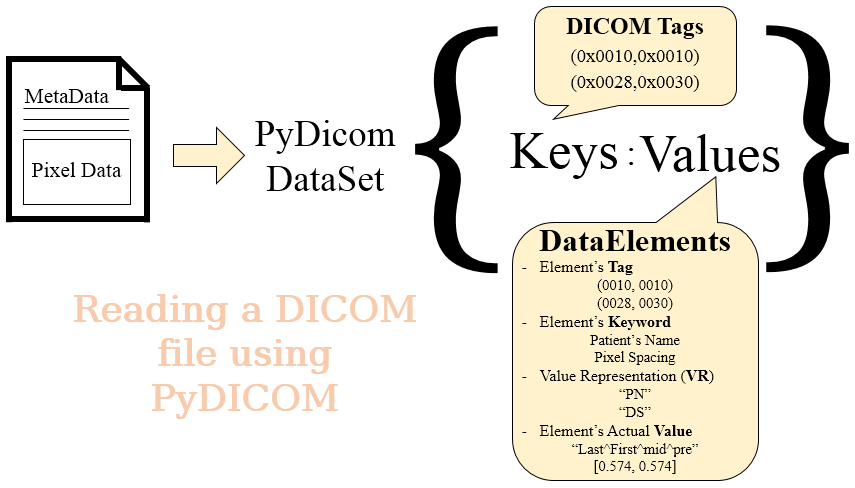

Now that we understand reading a DICOM file using PyDicom requires working directly with the main class, which is DataSet. Let's Discuss it in more depth and see what are the contents of a DataSet.

#**PyDICOM DataSet**
A DICOM DataSet is a mutable mapping of DICOM Data Elements. Each DataElement, a value of the dictionary, in the DICOM DataSet has a unique tag, a key of the dictionary, that identifies it. For example, the "PatientName" attribute corresponds to the tag (0x0010, 0x0010) in the DICOM standard, which identifies the patient's name data element. You can access a specific DICOM attribute using its name, PatientName for example.

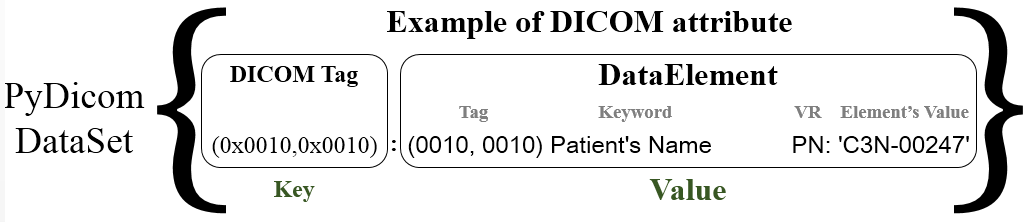

You can access specific DICOM attributes in many different ways like the following:

In [ ]:
# Extract the patient's name.
patient_name = dcm_data.PatientName
patient_name

'C3N-00247'

Or you can access the same attribute, PatientName, using its unique tag. For example, the tag of the PatientName attribute is (0010, 0010). Note that the numbers are in Hexadecimals as it is in the DICOM Standard.

In [ ]:
# Extract the patient's name using its unique DICOM tag (0010, 0010)
dcm_data[0x0010, 0x0010]

(0010, 0010) Patient's Name                      PN: 'C3N-00247'

**Notice** that using the tag, which is the key of the dataset dictionary, yields the whole value of the dictionary and not only the actual value of the attribute. To get only the actual value, you should use the .value attribute.

In [ ]:
# Extract the patient's name using its unique DICOM tag (0010, 0010)
dcm_data[0x0010, 0x0010].value

'C3N-00247'

It's up to you to decide whether you extract the specific attribute using its unique tag or using the keyword. Now let's see some of the useful methods and attributes we can use with DataSet class.

## **Methods for PyDicom DataSet**

### **.keys() Method**
Using .keys() returns the list of the keys of the DataSet dictionary. This method could be helpful when joining metadata from multiple sources of DICOM files that have common DICOM attributes.

In [ ]:
# Extract the keys, the DICOM tags, that are in a DICOM file
dcm_data.keys()

dict_keys([(0008, 0005), (0008, 0008), (0008, 0016), (0008, 0018), (0008, 0020), (0008, 0021), (0008, 0022), (0008, 0023), (0008, 0030), (0008, 0031), (0008, 0032), (0008, 0033), (0008, 0050), (0008, 0060), (0008, 0070), (0008, 0090), (0008, 1030), (0008, 103e), (0008, 1090), (0008, 1110), (0008, 1140), (0008, 2112), (0009, 0010), (0010, 0010), (0010, 0020), (0010, 0030), (0010, 0040), (0010, 1010), (0010, 2160), (0012, 0050), (0012, 0051), (0012, 0062), (0012, 0063), (0012, 0064), (0013, 0010), (0013, 1010), (0013, 1013), (0018, 0015), (0018, 0050), (0018, 0060), (0018, 0090), (0018, 1020), (0018, 1030), (0018, 1100), (0018, 1110), (0018, 1111), (0018, 1120), (0018, 1130), (0018, 1140), (0018, 1150), (0018, 1151), (0018, 1152), (0018, 1160), (0018, 1170), (0018, 1190), (0018, 1200), (0018, 1201), (0018, 1210), (0018, 5100), (0018, 9306), (0018, 9307), (0018, 9309), (0018, 9310), (0018, 9311), (0018, 9323), (0018, 9324), (0018, 9345), (0019, 0010), (0019, 10b0), (0020, 000d), (0020, 00

### **.values() Method**
This method returns a list of the values of the DataSet dictionary. It's kinda bulky and not preferred to read in this form. But this method could be useful for iterating over a list of values in some cases.

In [ ]:
# Extract the values, the DICOM attributes, that are in a DICOM file
dcm_data.values()

dict_values([(0008, 0005) Specific Character Set              CS: 'ISO_IR 100', (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], (0008, 0016) SOP Class UID                       UI: CT Image Storage, (0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055, (0008, 0020) Study Date                          DA: '20100227', (0008, 0021) Series Date                         DA: '20100227', (0008, 0022) Acquisition Date                    DA: '20100227', (0008, 0023) Content Date                        DA: '20100227', (0008, 0030) Study Time                          TM: '161937.171', (0008, 0031) Series Time                         TM: '162536.14', (0008, 0032) Acquisition Time                    TM: '162203.028699', (0008, 0033) Content Time                        TM: '162203.028699', (0008, 0050) Accession Number                    SH: '1598252606449858', (0008, 0060) Modality 

### **.elements() Method**
Using .elements() yields the top-level elements of the Dataset. This method will be useful when you don't need the DICOM attributes in any of the Sequences that you might find in the DICOM files you're working with. Notice how the Sequences are represented when using the .elements() method in the output below.

In [ ]:
# Extract the top-level elements of the Dataset Class
[*dcm_data.elements()]

[(0008, 0005) Specific Character Set              CS: 'ISO_IR 100',
 (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'],
 (0008, 0016) SOP Class UID                       UI: CT Image Storage,
 (0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055,
 (0008, 0020) Study Date                          DA: '20100227',
 (0008, 0021) Series Date                         DA: '20100227',
 (0008, 0022) Acquisition Date                    DA: '20100227',
 (0008, 0023) Content Date                        DA: '20100227',
 (0008, 0030) Study Time                          TM: '161937.171',
 (0008, 0031) Series Time                         TM: '162536.14',
 (0008, 0032) Acquisition Time                    TM: '162203.028699',
 (0008, 0033) Content Time                        TM: '162203.028699',
 (0008, 0050) Accession Number                    SH: '1598252606449858',
 (0008, 0060) Modality

### **.group_dataset() Method**
As we've mentioned above, you might find many attributes that have the same first number. These tags, the ones with a common first tag, usually describe a common parameter. For example, the attributes with the common first tag (0x0010) usually refer to Patient-related attributes. Attributes with the first tag (0x0028) describe Image Pixel attributes. Sometimes it's helpful to see all the attributes that are related to a specific parameter. Using the method (.group_dataset) returns a Dataset containing only elements of a certain group.

In [ ]:
# Extract the attributes related to 0x0028 tag, these are related to ImagePixel
dcm_data.group_dataset(0x0028)

(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: [0.564453125, 0.564453125]
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                         US: 12
(0028, 0102) High Bit                            US: 11
(0028, 0103) Pixel Representation                US: 0
(0028, 0106) Smallest Image Pixel Value          US: 0
(0028, 0107) Largest Image Pixel Value           US: 4095
(0028, 0303) Longitudinal Temporal Information M CS: 'MODIFIED'
(0028, 1050) Window Center                       DS: [-500, 40]
(0028, 1051) Window Width                        DS: [1500, 400]
(0028, 1052) Rescale Intercept                   DS: '-1024.0'
(0028, 1053) Rescale Slope                       DS: '1.0'
(0028, 1055) Window Center & Widt

### **.dir() Method**
Return an alphabetical list of element keywords in the Dataset. This is a great choice to make the first insight into the metadata that you're dealing with.

In [ ]:
# An alphabetical list of the element keywords in the DICOM DataSet.
dcm_data.dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'CTDIvol',
 'ClinicalTrialTimePointDescription',
 'ClinicalTrialTimePointID',
 'Columns',
 'ContentDate',
 'ContentTime',
 'ConvolutionKernel',
 'DataCollectionDiameter',
 'DateOfLastCalibration',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'EstimatedDoseSaving',
 'EthnicGroup',
 'Exposure',
 'ExposureModulationType',
 'ExposureTime',
 'FilterType',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'ImageComments',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'InstanceNumber',
 'KVP',
 'LargestImagePixelValue',
 'LongitudinalTemporalInformationModified',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'Pati

A filter of a specific set of attributes can be implemented as an argument to the .dir() method.

In [ ]:
# Extract all the attributes that have "Pixel" in its keywords
dcm_data.dir('Pixel')

['LargestImagePixelValue',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'SamplesPerPixel',
 'SmallestImagePixelValue']

## **Attributes for PyDicom DataSet**
There are some attributes that you can use with the DataSet class. But I will point out only one, the most important and commonly used attribute, pixel_array.

### **pixel_array Attribute**
This attribute returns the pixel data as a numpy.ndarray

In [ ]:
# Extract the image pixels
dcm_data.pixel_array

array([[356, 244, 201, ..., 190, 224,  76],
       [309, 387, 370, ..., 122,  17,   6],
       [334, 476, 486, ...,  29,  46,  47],
       ...,
       [ 98, 188, 186, ..., 156,  86, 125],
       [ 66, 138, 139, ..., 221,  74,  81],
       [168, 173, 100, ..., 188, 135, 147]], dtype=uint16)

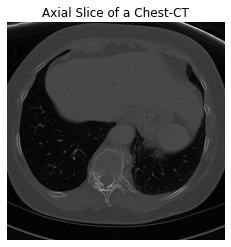

In [ ]:
# Image representation
im = dcm_data.pixel_array

plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Axial Slice of a Chest-CT')
plt.show()

# **PyDicom DataElement**
As we've mentioned above, a DataSet is a PyDicom class that contains a set of DICOM tags as keys and values as DICOM DataElements. DataElements are the values of the attributes or the metadata that you might find during reading DICOM files. It's useful to be able to access specific information that might interest you in your work or research without searching about it in such pretty large text-like data like above. You can access specific info inside a specific DataElement using attributes.

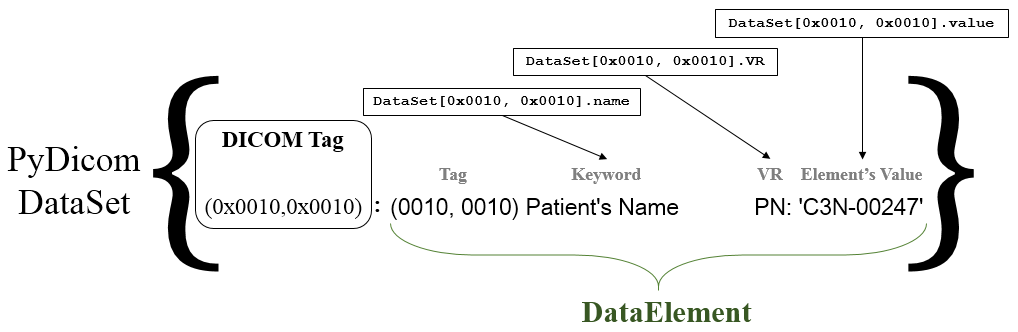

In [ ]:
# Return the element's keyword (if known) as str
kwrds = dcm_data[0x0010, 0x0010].keyword

# Return the DICOM dictionary name for the element as str
name = dcm_data[0x0010, 0x0010].name

# Return the element's Value Representation
vr = dcm_data[0x0010, 0x0010].VR

# Return the element's value.
value = dcm_data[0x0010, 0x0010].value

print("The element's Keyword              : ", kwrds)
print("The element's name                 : ", name)
print("The element's Value Representation : ", vr)
print("The element's value                : ", value)

The element's Keyword              :  PatientName
The element's name                 :  Patient's Name
The element's Value Representation :  PN
The element's value                :  C3N-00247


# **PyDicom Sequence**
The DataElement inside a PyDicom DataSet could contain values that are strings, integers, lists, or even a Sequence of data. The sequence is derived from Python's list. But it can even be a DataSet. Let's see how to access specific parameters in a specific Sequence. Since there's bulky information in the file we're working with, let's make use of the method .dir(*filter). With a proper filter implemented as an argument, we can extract the names of the "Sequence"s.

In [ ]:
# Extract all the attributes that have "Sequence" in its keywords
dcm_data.dir('Sequence')

['DeidentificationMethodCodeSequence',
 'ReferencedImageSequence',
 'ReferencedStudySequence',
 'SourceImageSequence']

Let's try to work with De-identification Method Code Sequence.

In [ ]:
# Return a specific Sequence, "DeidentificationMethodCodeSequence"
dcm_data.DeidentificationMethodCodeSequence

<Sequence, length 8>

To print out all the elements in the Sequence, we can use the indices.

In [ ]:
# Extract the contents of a Sequence
dcm_data.DeidentificationMethodCodeSequence[:]

[(0008, 0100) Code Value                          SH: '113100'
 (0008, 0102) Coding Scheme Designator            SH: 'DCM'
 (0008, 0104) Code Meaning                        LO: 'Basic Application Confidentiality Profile',
 (0008, 0100) Code Value                          SH: '113101'
 (0008, 0102) Coding Scheme Designator            SH: 'DCM'
 (0008, 0104) Code Meaning                        LO: 'Clean Pixel Data Option',
 (0008, 0100) Code Value                          SH: '113104'
 (0008, 0102) Coding Scheme Designator            SH: 'DCM'
 (0008, 0104) Code Meaning                        LO: 'Clean Structured Content Option',
 (0008, 0100) Code Value                          SH: '113105'
 (0008, 0102) Coding Scheme Designator            SH: 'DCM'
 (0008, 0104) Code Meaning                        LO: 'Clean Descriptors Option',
 (0008, 0100) Code Value                          SH: '113107'
 (0008, 0102) Coding Scheme Designator            SH: 'DCM'
 (0008, 0104) Code Meaning        

To access specific info inside the Sequence, we can use its index.

In [ ]:
# Return the info of specific line in a Sequence
dcm_data.DeidentificationMethodCodeSequence[0].CodeMeaning

'Basic Application Confidentiality Profile'